<a href="https://colab.research.google.com/github/amannitjsr/Machine-Learning/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#started
#Importing file 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import linear_model

Data collection and processing

In [ ]:
#importing data from csv
car_dataset = pd.read_csv('/content/drive/MyDrive/machine learning/car price/car data.csv')


In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_dataset.shape

(301, 9)

In [ ]:
#gettimg imformatin of data
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#checking the no. of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

since no missing value 
if there was a missing value then we will have to replace it with mean value or we shall delete it...
checking outliers will also be helpful....


In [ ]:
#checking car fuel type
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
#encoding the data
#categorical data
#inplace true used here if previously done 0,1 then no need to do
#encoding fuel type column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)

#encoding seller type column

car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}} , inplace=True)

#encoding Transmission type
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace= True)

we have encoded because computer understand better with number 0,1 used to change text data of category to 0,1 always

In [ ]:
#spliting the data into target and independent values
#to predict selling price as target this is dependent variable ....
X = car_dataset.drop(['Car_Name','Selling_Price'] , axis = 1)
Y = car_dataset['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
#spliting training and test data
#train size = 0.1 means 90% data will be training data and 10% testing data
#random_state = 2 means you have splitted your data like some diff manner random_state=3,4,5,6....we can put

X_train, X_test , Y_train,Y_test = train_test_split(X,Y,test_size=0.1 , random_state=2)


Model Training 

In [ ]:
#linear regression part
#declaring variable for linear regression

lin_reg = LinearRegression()

In [ ]:
#fit the model with training value
#it is basically a linear model
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#model evaluation 

training_data_prediction = lin_reg.predict(X_train)

In [ ]:
#R squared error
# now to match y_train data selling price with our predicted data
error_score = r2_score(Y_train, training_data_prediction)
print('R squared error =' ,error_score)  # <1 the good value...it depends on value , 4.75,5.6 like that ....

R squared error = 0.8799451660493711


Visualizing  the actual prices and predicted prices....

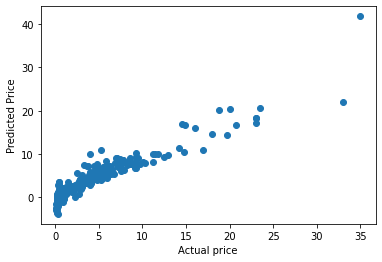

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.show() # this depict that our model predicted model is very much same

In [ ]:
#checking our test data also
test_data_prediction = lin_reg.predict(X_test)

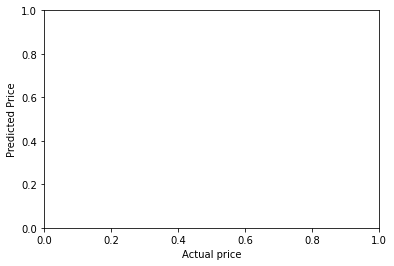

In [ ]:

plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.show() # this depict that our model predicted model is very much same

PREDICITING VALUE

In [ ]:
# you can change value and make get your price
#[year, present_price,kms_driven,fuel_type(0,1),seller_type(0,1), transmission(0,1),owner(0,1)]lin_reg.coef_ # gives m1,m2,m3,m4.......value
lin_reg.coef_
lin_reg.intercept_
#multiple values regression
lin_reg.predict([(2016,5.777,32222,1,0,0,0)])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([6.46784227])

In [ ]:
X_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
204,2015,4.430,28282,0,0,0,0
249,2016,7.600,17000,0,0,0,0
277,2015,13.600,21780,0,0,0,0
194,2008,0.787,50000,0,1,0,0
244,2013,9.400,49000,1,0,0,0
...,...,...,...,...,...,...,...
75,2015,6.800,36000,0,0,0,0
22,2011,8.010,50000,0,0,1,0
72,2013,18.610,56001,0,0,0,0
15,2016,10.790,43000,1,0,0,0


FIND REGRESSION WITH SINGLE VARIABLE

In [ ]:
reg = LinearRegression()
reg.fit(car_dataset[['Kms_Driven']],car_dataset.Present_Price)

LinearRegression()

In [ ]:
car_dataset[['Kms_Driven']]


,Kms_Driven
0,27000
1,43000
2,6900
3,5200
4,42450
...,...
296,33988
297,60000
298,87934
299,9000


In [ ]:
reg.intercept_

5.955929484955574

In [ ]:
#regression always take 2d values and all are point so we have to assign point on each bracket to do that.....
value=reg.predict([[54444]])
value


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([8.42052428])

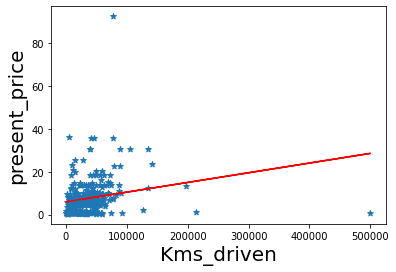

In [ ]:
#ploting the values
%matplotlib inline
plt.xlabel('Kms_driven',fontsize=20)
plt.ylabel('present_price',fontsize=20)
plt.scatter(car_dataset.Kms_Driven,car_dataset.Present_Price,marker='*')
plt.plot(car_dataset[['Kms_Driven']],reg.predict(car_dataset[['Kms_Driven']]),color='red')